# Exploratory notebook

In [1]:
import requests
import torch
from PIL import Image
from transformers import MllamaForConditionalGeneration, AutoProcessor

model_id = "meta-llama/Llama-3.2-11B-Vision-Instruct"
#model_id = "microsoft/Florence-2-large"

model = MllamaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)
processor = AutoProcessor.from_pretrained(model_id)

# url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/0052a70beed5bf71b92610a43a52df6d286cd5f3/diffusers/rabbit.jpg"
# image = Image.open(requests.get(url, stream=True).raw)


The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Some parameters are on the meta device because they were offloaded to the cpu.


In [2]:
img_file = "../books/103017-hide-and-seek/002.png"

# url = "https://example.com/your-image.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open(img_file)

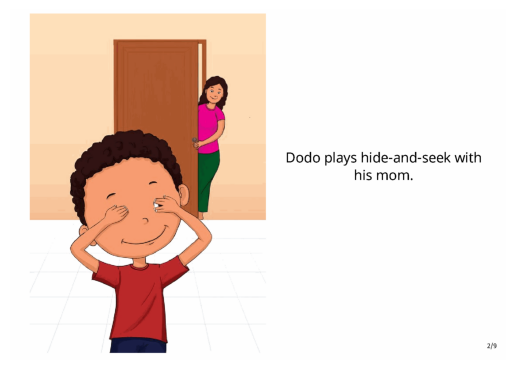

In [3]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

# Basic out of the box response ~ 4M on Nvidia Titan X

In [3]:

# messages = [
#     {"role": "user", "content": [
#         {"type": "image"},
#         {"type": "text", "text": "Describe the image which is from a children story book "}
#     ]}
# ]
# input_text = processor.apply_chat_template(messages, add_generation_prompt=True)
# inputs = processor(
#     image,
#     input_text,
#     add_special_tokens=False,
#     return_tensors="pt"
# ).to(model.device)

# output = model.generate(**inputs, max_new_tokens=30)
# print(processor.decode(output[0]))

<|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>Describe the image which is from a children story book <|eot_id|><|start_header_id|>assistant<|end_header_id|>

The image is a page from a children's storybook, featuring an illustration of a boy and his mother. 

*   The boy is wearing a


# Much more detailed response, took 8mins on Titan X

8m30s  : max_new_tokens = 200 * 3  # Using the upper limit and 3 tokens per word to ensure full coverage

In [11]:
# Process the input
input_text = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(image, input_text, return_tensors="pt").to(model.device)

# Calculate the number of tokens in the input
input_token_count = inputs["input_ids"].shape[-1]

# Calculate the maximum number of new tokens
max_new_tokens = 100 * 3  # Using the upper limit and 3 tokens per word to ensure full coverage

# Generate the output
output = model.generate(**inputs, max_new_tokens=max_new_tokens, do_sample=True, temperature=0.7)

# Decode and print the generated text
generated_text = processor.decode(output[0][input_token_count:], skip_special_tokens=True)
print(generated_text)

The image is a page from a children's storybook, featuring an illustration of a boy and his mother. The title of the story is not visible in the image.

* A boy:
	+ The boy has dark brown hair.
	+ He is wearing a red t-shirt and blue pants.
	+ He is standing in front of a door with his hands on his face.
	+ He appears to be playing "hide-and-seek" with his mom.
* A woman:
	+ The woman has long dark hair.
	+ She is wearing a pink shirt and green pants.
	+ She is standing behind the door, looking at the boy.
	+ She is smiling and appears to be waiting for the boy to find her.
* A door:
	+ The door is brown and has a rectangular shape.
	+ It is located behind the boy and the woman.
	+ It appears to be open, allowing the woman to see the boy.
* A wall:
	+ The wall is beige and has a tile floor.
	+ It is located behind the boy and the woman.
	+ It provides a neutral background for the scene.

The image suggests that the story is about a boy playing a game of hide-and-seek with his mother. T

In [4]:
generated_text = """
The image is a page from a children's storybook, featuring an illustration of a boy and his mother. The title of the story is not visible in the image.

* A boy:
	+ The boy has dark brown hair.
	+ He is wearing a red t-shirt and blue pants.
	+ He is standing in front of a door with his hands on his face.
	+ He appears to be playing "hide-and-seek" with his mom.
* A woman:
	+ The woman has long dark hair.
	+ She is wearing a pink shirt and green pants.
	+ She is standing behind the door, looking at the boy.
	+ She is smiling and appears to be waiting for the boy to find her.
* A door:
	+ The door is brown and has a rectangular shape.
	+ It is located behind the boy and the woman.
	+ It appears to be open, allowing the woman to see the boy.
* A wall:
	+ The wall is beige and has a tile floor.
	+ It is located behind the boy and the woman.
	+ It provides a neutral background for the scene.

The image suggests that the story is about a boy playing a game of hide-and-seek with his mother. The boy is excitedly waiting for his mom to find him, while his mom is patiently waiting behind the door. The image captures a heartwarming moment between a child and their parent, highlighting the joy and anticipation of playing
"""

APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


In [23]:
from openai import OpenAI

# Set your OpenAI API key
api_key = "<add key>"

client = OpenAI(
    api_key=api_key,  # this is also the default, it can be omitted
)

response = client.chat.completions.with_raw_response.create(
    messages=[
        {
            "role": "system",
            "content": "Imagine you are telling a story to a young child based on a children’s storybook page description. Summarize the description in simple, engaging language as if you are narrating a story aloud, using phrases and words that bring each scene to life and create a warm, friendly tone. Keep it concise but add a sense of wonder or excitement that will work well for text-to-speech narration.",
        },
        {
            "role": "user",
            "content": f"Here is the page description: {generated_text}",
        },
    ],
    model="gpt-4o-mini",
)
print(response.headers.get("x-ratelimit-limit-tokens"))

# get the object that `chat.completions.create()` would have returned
completion = response.parse()
print(completion)

2000000
ChatCompletion(id='chatcmpl-AMg5RpiDT0ukufshDymTMIpnY2n0x', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Once upon a time, in a cozy little home, a cheerful boy with dark brown hair wore his favorite red t-shirt and blue pants. He stood in front of a big brown door, his hands playfully on his cheeks, pretending he was hiding!\n\nBehind that door, his loving mother with long dark hair was waiting, dressed in a pretty pink shirt and green pants. She couldn’t help but smile, feeling the excitement in the air. What fun they were having in their game of hide-and-seek!\n\nThe walls were a warm beige, and the tile floor sparkled underneath their playful feet. The whole scene was filled with laughter and joy, as the boy waited eagerly for his mom to find him, creating a magical moment just for them. What a wonderful day for a game!', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=172996

# TTS

In [5]:
import pyttsx3

# Initialize the text-to-speech engine
engine = pyttsx3.init()

# Set properties (optional)
engine.setProperty('rate', 150)
engine.setProperty('volume', 1)

# Change voice (0 for male, 1 for female; may vary by system)
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[1].id)  # Set to female voice

# Text to be spoken
text = generated_text

# Speak the text
engine.say(text)

# # Save the speech to a file
# engine.save_to_file(text, 'output.mp3')

# Wait until the speech is finished
engine.runAndWait()

# TTS (better voices)

In [9]:
from gtts import gTTS
import os

# Text to be spoken
text = "Hello, welcome to the world of Python programming!"

# Create a gTTS object
tts = gTTS(text=generated_text, lang='en-uk', slow=False)

# Save the audio file
tts.save("output.mp3")


# Optionally, play the audio file (works on Windows)
os.system("start output.mp3")  # For macOS, use 'afplay output.mp3'
# For Linux, use 'mpg321 output.mp3'

0

# OCR

https://github.com/UB-Mannheim/tesseract/wiki (install windows)

In [10]:
import pytesseract

# Specify the path to Tesseract if needed
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load the image
# image_path = 'path_to_your_image.jpg'  # Change this to your image path
# image = Image.open(image_path)

# Perform OCR
extracted_text = pytesseract.image_to_string(image)

# Print the results
print("Extracted Text:")
print(extracted_text)

Extracted Text:
Dodo plays hide-and-seek with
his mom.

2/9

